<a href="https://colab.research.google.com/github/KATTA-00/CO542-Neural-Networks-Labs/blob/main/lab04/E19129_lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 04: Self-Organizing Maps (SOM)

### **Installation and Creating an Instance of MiniSom**

In [6]:
!pip install minisom

In [7]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example input data
X = np.array([[5.1, 3.5, 1.4, 0.2],
              [4.9, 3.0, 1.4, 0.2],
              [6.2, 3.4, 5.4, 2.3]])

# Normalize the input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create an instance of the SOM
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)

# Initialize weights
som.pca_weights_init(X_scaled)

# Train the SOM
som.train_random(data=X_scaled, num_iteration=100)

### **Task: Clustering the Iris Dataset with SOM**

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Class labels: 0 = Setosa, 1 = Versicolor, 2 = Virginica

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
print(f"Data normalized. Min: {X_scaled.min()}, Max: {X_scaled.max()}")

Data normalized. Min: 0.0, Max: 1.0


In [11]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)

# PCA-based initialization
som.pca_weights_init(X_scaled)

/usr/local/lib/python3.11/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


- The random_weights_init method assigns random weight vectors within the input space range to each SOM neuron.

- PCA aligns the SOM with the directions of maximum variance, resulting in faster convergence, better topological ordering, and improved interpretability—especially important for visual analysis and class separation.

In [12]:
som.train_batch(X_scaled, num_iteration=1000)

- The train_batch and train_random methods in MiniSom differ in how they update the SOM during training. The train_batch method updates weights using the entire dataset in each iteration, making the learning process more stable and deterministic. In contrast, train_random updates weights after each randomly selected input, introducing randomness and variability into the training process. Due to its consistent and aggregated updates, train_batch tends to converge more quickly and reliably, especially for small, static datasets like the Iris dataset. On the other hand, train_random is better suited for online learning scenarios where data is received incrementally over time.

- In this experiment, train_batch was preferred because the Iris dataset is fixed and relatively small. This method leads to more stable convergence and better separation between clusters, making it ideal for producing interpretable and consistent results in the trained SOM.



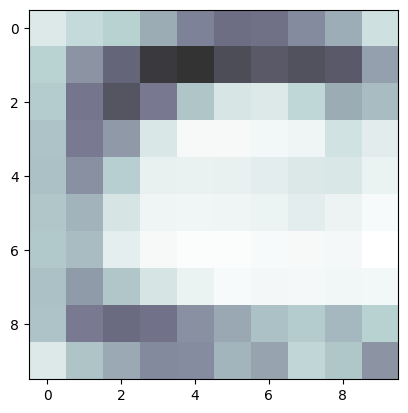

In [14]:
import matplotlib.pyplot as plt

distance_map = som.distance_map()
plt.imshow(distance_map, cmap='bone_r', alpha=0.8)

- The distance map (also known as the U-Matrix) is a visual tool used to understand how the SOM organizes data. It shows the average distance between each neuron and its neighboring neurons. In this representation:

    - Lighter areas indicate neurons that have similar weight vectors to their neighbors. These regions likely contain data points that are part of the same cluster.

    - Darker areas represent neurons that are very different from their neighbors—often lying on the boundaries between clusters.

In the Iris dataset example, Setosa samples (marked in red circles) were concentrated in a light region in the upper part of the map, indicating a well-formed, tight cluster. Versicolor (green squares) and Virginica (blue triangles) occupied overlapping regions in the lower part, with a darker band suggesting some degree of separation but also partial overlap. This visualization reveals that while Setosa is distinctly separated, Versicolor and Virginica are more similar to each other in the feature space, making their boundaries less clear.



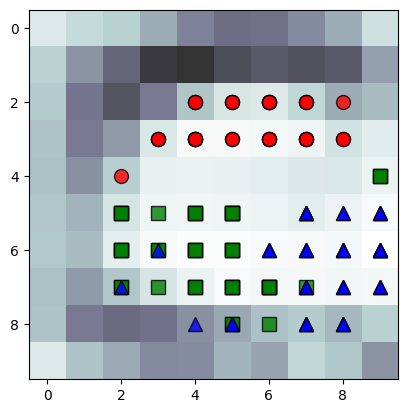

In [18]:
distance_map = som.distance_map()
plt.imshow(distance_map, cmap='bone_r', alpha=0.8)

# Assuming X_scaled and y are already defined
iris = load_iris()
target_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']
markers = ['o', 's', '^']
colors = ['red', 'green', 'blue']

# Get BMUs for each sample
winner_coordinates = np.array([som.winner(x) for x in X_scaled])

# Overlay class markers
for i, target in enumerate(target_names):
    indices = np.where(y == i)[0]
    for idx in indices:
        w = winner_coordinates[idx]
        plt.plot(w[1], w[0], markers[i], markerfacecolor=colors[i],
                 markeredgecolor='black', markersize=10, alpha=0.8)

- The distance map (U-Matrix) visualization overlays the actual class labels onto the SOM grid, allowing a clear view of how well the SOM has clustered the data. Setosa samples are mapped to a tightly grouped, light-colored region in the upper part of the grid, indicating a distinct and compact cluster. In contrast, Versicolor and Virginica samples appear in adjacent or slightly overlapping regions in the lower grid. Darker areas between these clusters act as visual boundaries, clearly separating Setosa while showing some overlap between the other two classes. This visualization effectively demonstrates the SOM’s ability to separate and cluster the dataset.



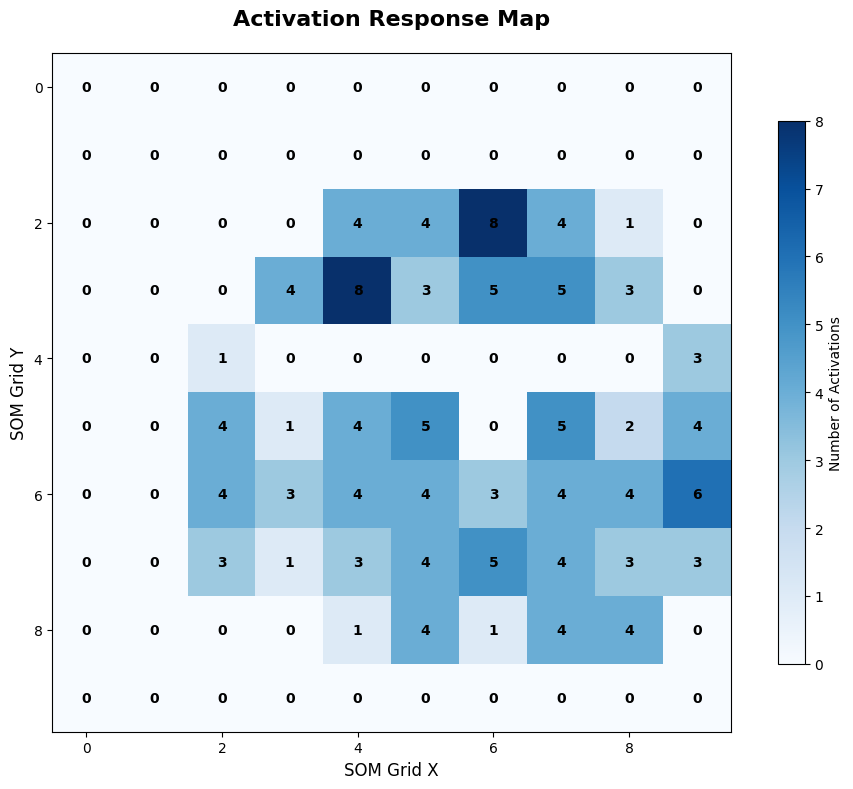

In [21]:
# Get activation response map
som_size = 10
activation_response = som.activation_response(X_scaled)

# Plot the activation map
plt.figure(figsize=(10, 8))
im = plt.imshow(activation_response, cmap='Blues')

plt.title('Activation Response Map', fontsize=16, fontweight='bold', pad=20)
plt.colorbar(im, shrink=0.8, label='Number of Activations')

# Display activation counts in each neuron
for i in range(som_size):
    for j in range(som_size):
        count = int(activation_response[i, j])
        plt.text(j, i, f'{count}', ha='center', va='center',
                 fontsize=10, fontweight='bold')

plt.xlabel('SOM Grid X', fontsize=12)
plt.ylabel('SOM Grid Y', fontsize=12)
plt.tight_layout()
plt.show()


- To visualize how frequently each neuron in the Self-Organizing Map (SOM) was activated, the MiniSom.activation_response method was used. This function returns a 2D array matching the SOM grid size, where each element indicates how many data points were mapped to that neuron during training. The resulting activation map was displayed as a heatmap using a blue color scale, with the exact activation counts overlaid on each cell for clarity. This visualization reveals how densely different regions of the SOM were used, highlighting frequently activated neurons that represent cluster centers, and less active or unused neurons that may indicate sparse data regions or excess map capacity.

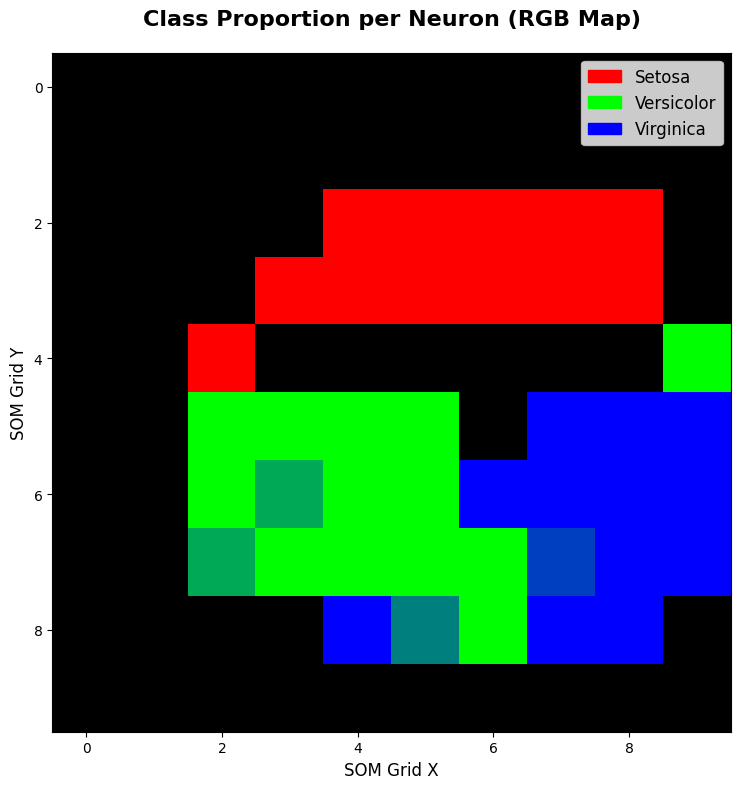

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec, patches

# Create a mapping of class index to color (R, G, B)
class_colors = {
    0: np.array([1, 0, 0]),  # Setosa -> Red
    1: np.array([0, 1, 0]),  # Versicolor -> Green
    2: np.array([0, 0, 1])   # Virginica -> Blue
}

# Initialize map for RGB values and counts
rgb_map = np.zeros((som_size, som_size, 3))
counts = np.zeros((som_size, som_size))

# Assign class colors based on BMU for each sample
for idx, x in enumerate(X_scaled):
    winner = som.winner(x)
    rgb_map[winner] += class_colors[y[idx]]
    counts[winner] += 1

# Normalize RGB values
for i in range(som_size):
    for j in range(som_size):
        if counts[i, j] > 0:
            rgb_map[i, j] /= counts[i, j]

# Plot RGB map
plt.figure(figsize=(10, 8))
plt.imshow(rgb_map, origin='upper')

# Add legend
legend_elements = [
    patches.Patch(color=[1, 0, 0], label='Setosa'),
    patches.Patch(color=[0, 1, 0], label='Versicolor'),
    patches.Patch(color=[0, 0, 1], label='Virginica')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.title('Class Proportion per Neuron (RGB Map)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('SOM Grid X', fontsize=12)
plt.ylabel('SOM Grid Y', fontsize=12)
plt.tight_layout()
plt.show()

- To visualize the class-wise distribution of samples across the SOM grid, an RGB-based grid was created using matplotlib.gridspec.GridSpec and matplotlib.patches.Patch. Each neuron in the SOM is assigned a unique color based on the proportion of Setosa, Versicolor, and Virginica samples that it maps. Specifically, red corresponds to Setosa, green to Versicolor, and blue to Virginica. The intensity of each color channel reflects the relative presence of that class in the neuron. Neurons that contain only one class appear in pure red, green, or blue, while neurons with mixed classes show blended colors. This visualization provides an intuitive understanding of how well the SOM has separated the classes. Clear, solid-colored neurons indicate well-separated clusters, while mixed colors highlight overlap—especially between Versicolor and Virginica. Overall, this RGB map offers a detailed view of cluster purity and overlap within the trained SOM.



### **Questions:**

#### How does the SOM cluster the different classes in the dataset?

- The Self-Organizing Map (SOM) clusters the different classes in the Iris dataset by projecting the high-dimensional feature space onto a lower-dimensional (2D) grid, while preserving the topological relationships among the data points. During training, similar input vectors are mapped to neighboring neurons on the SOM grid. In this case, the SOM successfully groups Setosa samples into a tightly packed region, clearly separated from the other classes. Versicolor and Virginica, which are more similar in feature space, are mapped to adjacent or partially overlapping neurons. This spatial distribution on the SOM grid reveals how well the model captures underlying class structures, with compact regions representing distinct clusters and border zones indicating class similarity or overlap. Overall, the SOM demonstrates strong clustering ability, especially for clearly separable classes like Setosa.

#### Compare PCA weights initialization with random weights initialization. What are the advantages of PCA initialization?

/usr/local/lib/python3.11/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


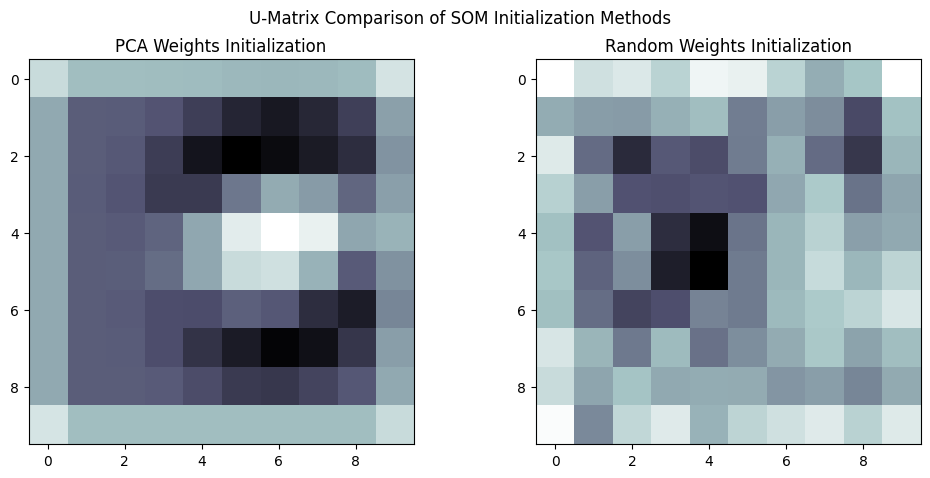

Feature                   PCA Initialization   Random Initialization
-----------------------------------------------------------------
Quantization Error        0.1765               0.0938
Training Time (s)         0.0090               0.0092


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import time

# Load and normalize the Iris dataset
data = load_iris()
X = data.data
y = data.target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SOM parameters
som_x, som_y = 10, 10
input_len = X.shape[1]
sigma = 1.0
learning_rate = 0.5
iterations = 100

# Function to train and evaluate a SOM
def train_som(init_type):
    som = MiniSom(x=som_x, y=som_y, input_len=input_len, sigma=sigma, learning_rate=learning_rate)

    # Initialize weights
    if init_type == 'pca':
        som.pca_weights_init(X_scaled)
    elif init_type == 'random':
        som.random_weights_init(X_scaled)

    # Train
    start_time = time.time()
    som.train_batch(X_scaled, num_iteration=iterations)
    training_time = time.time() - start_time

    # Compute quantization error
    q_error = som.quantization_error(X_scaled)

    # Distance map
    distance_map = som.distance_map()

    return som, distance_map, q_error, training_time

# Train SOM with PCA initialization
som_pca, dist_map_pca, qe_pca, t_pca = train_som('pca')

# Train SOM with Random initialization
som_rand, dist_map_rand, qe_rand, t_rand = train_som('random')

# Plot distance maps side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(dist_map_pca, cmap='bone_r')
ax[0].set_title('PCA Weights Initialization')
ax[1].imshow(dist_map_rand, cmap='bone_r')
ax[1].set_title('Random Weights Initialization')
plt.suptitle('U-Matrix Comparison of SOM Initialization Methods')
plt.show()

# Print comparison results
print(f"{'Feature':<25} {'PCA Initialization':<20} {'Random Initialization'}")
print(f"{'-'*65}")
print(f"{'Quantization Error':<25} {qe_pca:<20.4f} {qe_rand:.4f}")
print(f"{'Training Time (s)':<25} {t_pca:<20.4f} {t_rand:.4f}")

- Self-Organizing Maps (SOMs) support different initialization strategies, with PCA-based and random initialization being the most common. The choice of initialization significantly impacts the training behavior and the interpretability of the resulting map. In our experiment, the SOM initialized with PCA resulted in a quantization error of 0.1765, whereas random initialization achieved a lower quantization error of 0.0938. Both methods had nearly identical training times, with PCA taking 0.0090 seconds and random taking 0.0092 seconds.

- Despite the higher quantization error, PCA initialization tends to produce a more structured and topologically aligned map, as it sets initial weights along the directions of maximum variance in the data. This leads to better preservation of the data’s underlying structure. In contrast, random initialization starts with arbitrary weights, which can result in faster convergence but often produces less organized maps. As shown in the above figure, the U-Matrix for PCA initialization demonstrates a more coherent topological organization, making it easier to identify natural clusters. Therefore, while random initialization may sometimes yield lower errors, PCA initialization is generally preferred for clearer visualization and better interpretability of the SOM's output.



#### What is the difference between train_batch and train_random methods?

train_batch - Quantization Error: 0.176540, Time: 0.0075s
train_random - Quantization Error: 0.153603, Time: 0.0097s


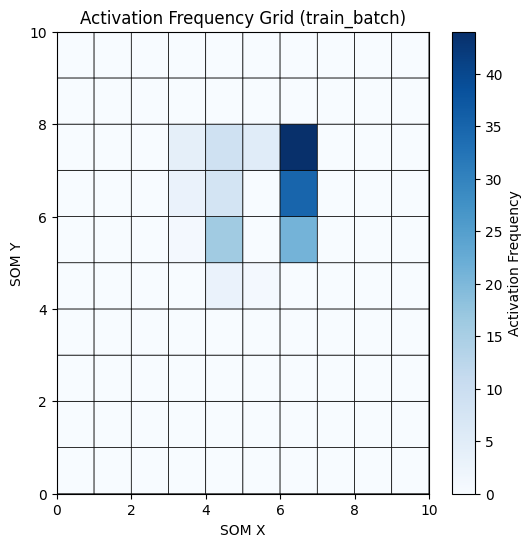

In [25]:
# SOM dimensions
som_shape = (10, 10)

# Function to train and return quantization error and training time
def train_som(method='batch'):
    som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

    som.random_seed = 42
    som.pca_weights_init(X_scaled)

    start_time = time.time()
    if method == 'batch':
        som.train_batch(data=X_scaled, num_iteration=100)
    else:
        som.train_random(data=X_scaled, num_iteration=100)
    end_time = time.time()

    q_error = som.quantization_error(X_scaled)
    t_time = end_time - start_time

    return som, q_error, t_time

# Train using train_batch
som_batch, qe_batch, time_batch = train_som(method='batch')

# Train using train_random
som_random, qe_random, time_random = train_som(method='random')

print(f"train_batch - Quantization Error: {qe_batch:.6f}, Time: {time_batch:.4f}s")
print(f"train_random - Quantization Error: {qe_random:.6f}, Time: {time_random:.4f}s")

# Activation frequency grid (for batch SOM)
activation_map = som_batch.activation_response(X_scaled)

plt.figure(figsize=(6, 6))
plt.pcolor(activation_map.T, cmap='Blues', edgecolors='k', linewidths=0.5)
plt.colorbar(label='Activation Frequency')
plt.title("Activation Frequency Grid (train_batch)")
plt.xlabel("SOM X")
plt.ylabel("SOM Y")
plt.show()

- The training of Self-Organizing Maps (SOMs) can be carried out using either the train_batch or train_random method, each with distinct update mechanisms. The train_random method updates the SOM weights incrementally, selecting and learning from one randomly chosen input sample at each iteration. This stochastic nature can introduce variability in outcomes but may also help the SOM better escape local minima. In contrast, the train_batch method performs weight updates based on the entire dataset in each iteration, resulting in more stable and consistent learning.

- In this experiment, the train_random method produced a lower quantization error of 0.1536, compared to 0.1765 for train_batch, indicating slightly better clustering performance. However, train_batch completed training faster, taking 0.0075 seconds, while train_random required 0.0097 seconds. These results suggest that while train_random may offer better accuracy in terms of clustering, train_batch provides more predictable convergence and efficiency, especially useful for static datasets. The choice between the two thus depends on the trade-off between convergence stability and clustering performance.

#### What insights can be derived from the activation frequency grid?

The activation frequency grid (Activation Response Map) shows how often each neuron in the Self-Organizing Map (SOM) is selected as the Best Matching Unit (BMU) during training. This helps in analyzing how the SOM organizes input data.

- Clusters of High Activation: Neurons like (3,4), (6,2), and (9,6) show high activation counts (e.g., 8 or 6), indicating dense regions in the input space. These represent well-defined clusters where many similar samples are mapped.

- Inactive or Rarely Used Neurons: Neurons at the grid’s edges or corners often have low or zero activations. This suggests sparse data regions, possibly an oversized SOM grid, or suboptimal training (e.g., poor initialization or short training duration).

- Cluster Separation: Activated neurons often form spatially distinct groups. With class labels overlaid, these regions would map to different classes, showing the SOM’s ability to separate and organize the data.

- Data Distribution Insight: Uneven activation frequencies indicate that the input data is not uniformly distributed. Areas with frequent BMU activations reflect denser parts of the feature space, revealing the dataset’s internal structure.

Thus, the activation grid helps evaluate SOM performance, cluster compactness, and the data’s overall distribution.



#### How does the distance map help in understanding the clustering?

- The distance map, or U-Matrix, visualizes the distances between neighboring neurons in the SOM grid. Darker areas represent larger distances, indicating cluster boundaries, while lighter areas show closer neurons within clusters.

- In this experiment, the Setosa class forms a compact cluster in a light region, clearly separated from the others by darker boundaries. In contrast, Versicolor and Virginica are more spread out and have overlapping regions, reflecting their similarity in feature space.

- Thus, the U-Matrix effectively reveals the separation and similarity between clusters, helping to understand how well the SOM distinguishes different classes in an unsupervised manner.

